In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import scipy.stats as stats
import astropy

In [2]:
datapath = 'mwm/'

In [3]:
os.listdir(datapath)

['arMADGICS_out_x_starLines_v0.h5',
 'arMADGICS_out_x_skyContinuum_v0.h5',
 'arMADGICS_out_simplemsk.h5',
 'arMADGICS_out_x_starContinuum_v0.h5',
 'exposures-lite.fits',
 'arMADGICS_out_x_residuals_v0.h5',
 'arMADGICS_out_x_skyLines_faint_v0.h5',
 'index.autorec',
 'arMADGICS_out_x_starLines_restFrame_v0.h5',
 'exposures.h5',
 'arMADGICS_out_flux.h5',
 'arMADGICS_out_x_residuals_z_v0.h5',
 'arMADGICS_out_x_starLines_err_v0.h5',
 'arMADGICS_out_fluxivar.h5',
 'arMADGICS_out_finalmsk.h5',
 'README',
 'arMADGICS_out_apVisit_v0.h5']

In [6]:

exposure_data = h5py.File(f"{datapath}exposures.h5")

ra = np.array(exposure_data["ra"])
dec = np.array(exposure_data["dec"])
tele = np.array(exposure_data["observatory"])
adjfiberindx = np.array(exposure_data["adjfiberindx"])
sdss_id = np.array(exposure_data["sdss_id"])
category = np.array(exposure_data["category"])
too = np.array(exposure_data["too"]).astype(bool)
RV_pixoff_final = np.array(exposure_data["RV_pixoff_final"])
v_rad = np.array(exposure_data["v_rad"])
e_v_rad = np.array(exposure_data["e_v_rad"])
mjd = np.array(exposure_data["mjd"])
snr = np.array(exposure_data["snr"])

exposure = np.array(exposure_data["exposure"])
nread_total = np.array(exposure_data["nread_total"])
ndiff_used = np.array(exposure_data["ndiff_used"])
mjd_mid_exposure = np.array(exposure_data["mjd_mid_exposure"])
dithered_pixels = np.array(exposure_data["dithered_pixels"])
seeing = np.array(exposure_data["seeing"])
image_type = np.array(exposure_data["image_type"])
adjusted_fiber_index = np.array(exposure_data["adjusted_fiber_index"])
bitmsk_relFluxFile = np.array(exposure_data["bitmsk_relFluxFile"])
wavecal_type = np.array(exposure_data["wavecal_type"])
trace_type = np.array(exposure_data["trace_type"])
trace_found_match = np.array(exposure_data["trace_found_match"])
extraction_method = np.array(exposure_data["extraction_method"])
fiber_type = np.array(exposure_data["fiber_type"])
throughput = np.array(exposure_data["throughput"])
fiber_id = np.array(exposure_data["fiber_id"])
RV_pixoff_disc_final = np.array(exposure_data["RV_pixoff_disc_final"])
RV_minchi2_final = np.array(exposure_data["RV_minchi2_final"])
RV_pix_var = np.array(exposure_data["RV_pix_var"])


RV_pixoff_final = np.array(exposure_data["RV_pixoff_final"])
RVchi2_residuals = np.array(exposure_data["RVchi2_residuals"])
avg_flux_conservation = np.array(exposure_data["avg_flux_conservation"])
data_pix_cnt = np.array(exposure_data["data_pix_cnt"])

final_pix_cnt = np.array(exposure_data["final_pix_cnt"])
flux_nans = np.array(exposure_data["flux_nans"])
fluxerr2_nans = np.array(exposure_data["fluxerr2_nans"])
skyscale0 = np.array(exposure_data["skyscale0"])
skyscale1 = np.array(exposure_data["skyscale1"])
starscale0 = np.array(exposure_data["starscale0"])
tot_p5chi2_v0 = np.array(exposure_data["tot_p5chi2_v0"])

v_barycentric_correction = np.array(exposure_data["v_barycentric_correction"])
v_rad_flags = np.array(exposure_data["v_rad_flags"])

exposure_data.close()



In [7]:
curr_id = 94846885
period = 0.709
# period = 0.708719909191

match_id = np.where(sdss_id == curr_id)[0]
print(f'Found N={len(match_id)} entries for sdss_id={curr_id}')


Found N=74 entries for sdss_id=94846885


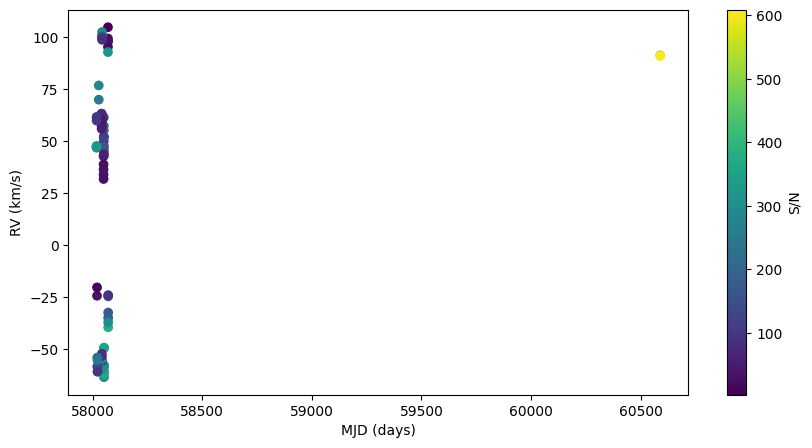

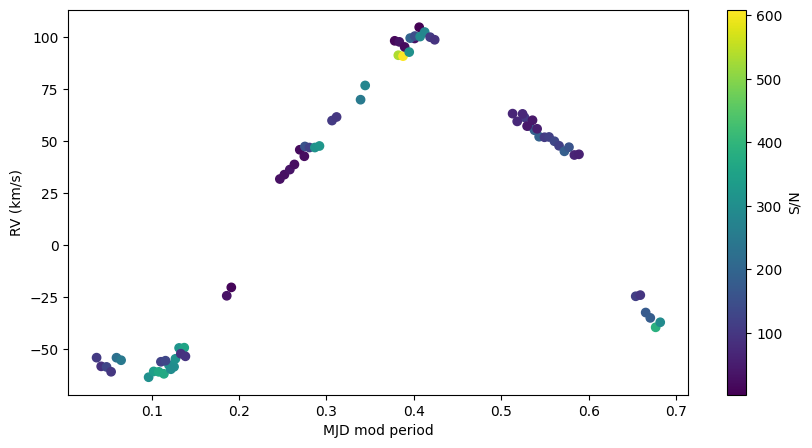

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(mjd_mid_exposure[match_id],v_rad[match_id],c=snr[match_id])
plt.colorbar(label='S/N')
plt.xlabel('MJD (days)')
plt.ylabel('RV (km/s)')
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(mjd_mid_exposure[match_id]%period,v_rad[match_id],c=snr[match_id])
plt.colorbar(label='S/N')
plt.xlabel('MJD mod period')
plt.ylabel('RV (km/s)')
plt.show()

In [11]:
#  	0 	No problems
# 0 	1 	reference array pixels
# 1 	2 	reference pixels
# 2 	4 	bad reference pixels
# 3 	8 	pixels not dark corrected
# 4 	16 	pixels with negative dark current
# 5 	32 	pixels with large dark current
# 6 	64 	flat response too low
# 7 	128 	one diff was dropped because it is a likely cosmic ray
# 8 	256 	more than one diff was dropped because they were likely cosmic rays (sus)
# 9 	512 	bad linear SUTR chi2
# 10 	1024 	failed 1D extraction
# 11 	2048 	no nearby good pixels in 1D extraction
# 12 	4096 	neff>10 in 1D extraction
# 13 	8192 	pixel partially saturated
# 14 	16384 	pixel fully saturated

bad_pix_bits = 8150

In [12]:
length = 8700
uni_wave_APOGEE = np.power(10,np.arange(4.17825, 4.17825+(length-1)*6.0e-6, step = 6.0e-6))
x_inds = np.arange(len(uni_wave_APOGEE))

In [22]:
with h5py.File(f"{datapath}arMADGICS_out_x_starLines_v0.h5") as fp:
    print(fp.keys())
    star_fluxes_obs = np.array(fp["x_starLines_v0"][match_id])

with h5py.File(f"{datapath}arMADGICS_out_x_starLines_restFrame_v0.h5") as fp:
    print(fp.keys())
    star_fluxes_rest = np.array(fp["x_starLines_restFrame_v0"][match_id])

with h5py.File(f"{datapath}arMADGICS_out_x_starLines_err_v0.h5") as fp:
    print(fp.keys())
    star_flux_errs = np.array(fp["x_starLines_err_v0"][match_id])


<KeysViewHDF5 ['x_starLines_v0']>
<KeysViewHDF5 ['x_starLines_restFrame_v0']>
<KeysViewHDF5 ['x_starLines_err_v0']>


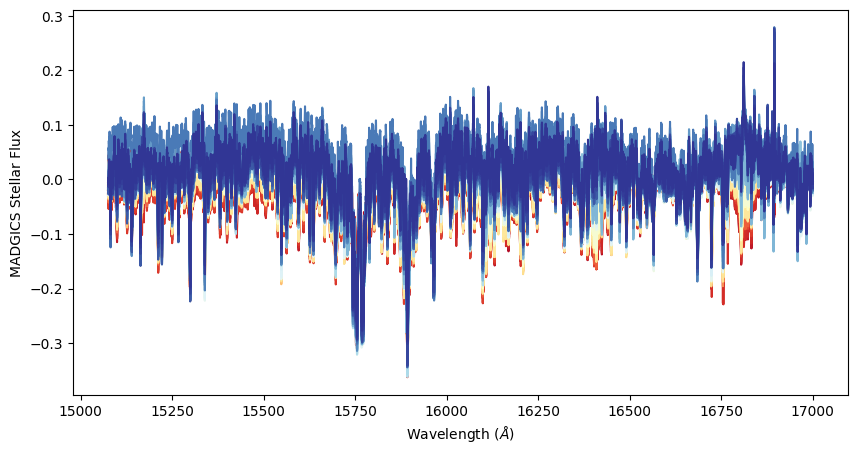

In [39]:
plot_mjds = mjd[match_id]
plot_snrs = snr[match_id]
colors = plt.cm.RdYlBu(np.linspace(0,1,len(plot_mjds)))

plt.figure(figsize=(10,5))
for j in range(len(plot_mjds)):
    plt.plot(uni_wave_APOGEE,star_fluxes_rest[j],c=colors[j])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('MADGICS Stellar Flux')
plt.show()

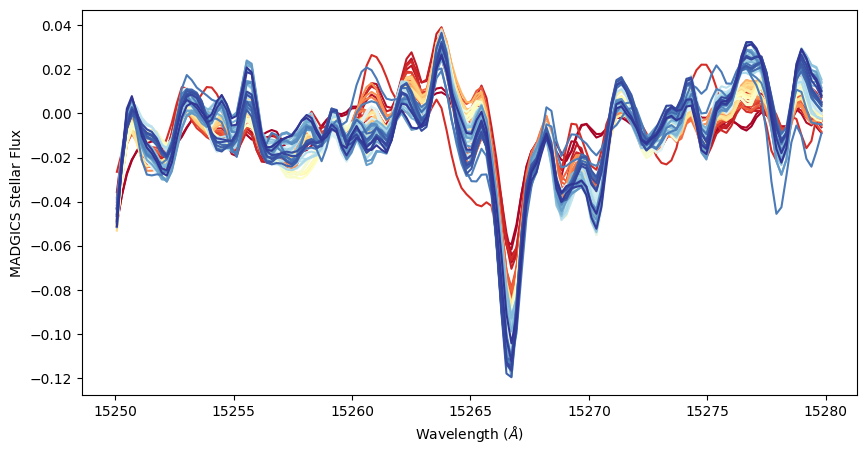

In [38]:
x_range = (15250,15280)
curr_keep = (uni_wave_APOGEE > x_range[0]) & (uni_wave_APOGEE < x_range[1])

offsets = np.nanmedian(star_fluxes_rest[:,curr_keep]-star_fluxes_rest[0,curr_keep],axis=1)

plt.figure(figsize=(10,5))
for j in range(len(plot_mjds)):
    plt.plot(uni_wave_APOGEE[curr_keep],star_fluxes_rest[j,curr_keep]-offsets[j],c=colors[j])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('MADGICS Stellar Flux')

plt.show()